备用

# 实例:人脸识别

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

数据可从cs.nyu.edu/~roweis/data/olivettifaces.mat  下载

数据下载后在datasets目录下有一个olivettifaces.mat文件

olivettifaces数据，最小的人脸识别数据集。
一共有40个人的图像数据，每个人10张。

这个数据集的全部数据

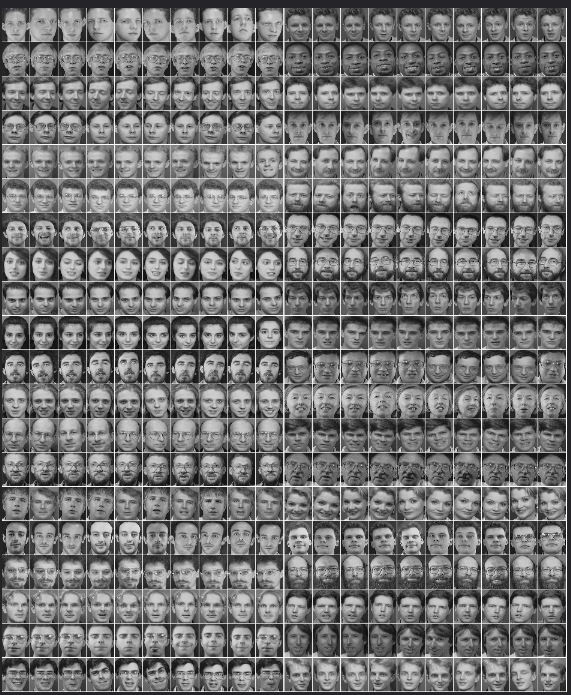(attachment:%E5%9B%BE%E7%89%87.png)

利用下载的数据集。

In [8]:
import time
import logging
from scipy.io import loadmat,savemat,whosmat
mfile=loadmat('datasets/olivettifaces.mat')

In [4]:
#faces=loadmat('datasets/olivettifaces.mat')

如果没有下载的数据集，下面代码进行下载

import time
import logging
from sklearn.datasets import fetch_olivetti_faces

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

data_home='datasets/'
logging.info('Start to load dataset')
faces = fetch_olivetti_faces(data_home=data_home)
logging.info('Done with load dataset')

In [7]:
X = faces.data
y = faces.target
targets = np.unique(faces.target)
target_names = np.array(["c%d" % t for t in targets])
n_targets = target_names.shape[0]
n_samples, h, w = faces.images.shape
print('Sample count: {}\nTarget count: {}'.format(n_samples, n_targets))
print('Image size: {}x{}\nDataset shape: {}\n'.format(w, h, X.shape))

AttributeError: 'dict' object has no attribute 'faces'

In [ ]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    """显示图片阵列"""
    plt.figure(figsize=(2 * n_col, 2.2 * n_row), dpi=144)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.01)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.axis('off')

In [ ]:
n_row = 2
n_col = 6

sample_images = None
sample_titles = []
for i in range(n_targets):
    people_images = X[y==i]
    people_sample_index = np.random.randint(0, people_images.shape[0], 1)
    people_sample_image = people_images[people_sample_index, :]
    if sample_images is not None:
        sample_images = np.concatenate((sample_images, people_sample_image), axis=0)
    else:
        sample_images = people_sample_image
    sample_titles.append(target_names[i])

plot_gallery(sample_images, sample_titles, h, w, n_row, n_col)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

In [ ]:
from sklearn.svm import SVC

start = time.clock()
print('Fitting train datasets ...')
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
print('Done in {0:.2f}s'.format(time.clock()-start))

In [ ]:
start = time.clock()
print("Predicting test dataset ...")
y_pred = clf.predict(X_test)
print('Done in {0:.2f}s'.format(time.clock()-start))

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=range(n_targets))
print("confusion matrix:\n")
np.set_printoptions(threshold=np.nan)
print(cm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.decomposition import PCA

print("Exploring explained variance ratio for dataset ...")
candidate_components = range(10, 300, 30)
explained_ratios = []
start = time.clock()
for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(X)
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))
print('Done in {0:.2f}s'.format(time.clock()-start))

In [ ]:
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5, 1.05, .05))
plt.xticks(np.arange(0, 300, 20));

In [ ]:
def title_prefix(prefix, title):
    return "{}: {}".format(prefix, title)

In [ ]:
n_row = 1
n_col = 5

sample_images = sample_images[0:5]
sample_titles = sample_titles[0:5]

plotting_images = sample_images
plotting_titles = [title_prefix('orig', t) for t in sample_titles]
candidate_components = [140, 75, 37, 19, 8]
for c in candidate_components:
    print("Fitting and projecting on PCA(n_components={}) ...".format(c))
    start = time.clock()
    pca = PCA(n_components=c)
    pca.fit(X)
    X_sample_pca = pca.transform(sample_images)
    X_sample_inv = pca.inverse_transform(X_sample_pca)
    plotting_images = np.concatenate((plotting_images, X_sample_inv), axis=0)
    sample_title_pca = [title_prefix('{}'.format(c), t) for t in sample_titles]
    plotting_titles = np.concatenate((plotting_titles, sample_title_pca), axis=0)
    print("Done in {0:.2f}s".format(time.clock() - start))

print("Plotting sample image with different number of PCA conpoments ...")
plot_gallery(plotting_images, plotting_titles, h, w,
    n_row * (len(candidate_components) + 1), n_col)

In [ ]:
n_components = 140

print("Fitting PCA by using training data ...")
start = time.clock()
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
print("Done in {0:.2f}s".format(time.clock() - start))

print("Projecting input data for PCA ...")
start = time.clock()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Done in {0:.2f}s".format(time.clock() - start))

In [ ]:
from sklearn.model_selection import GridSearchCV

print("Searching the best parameters for SVC ...")
param_grid = {'C': [1, 5, 10, 50, 100],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, verbose=2, n_jobs=4)
clf = clf.fit(X_train_pca, y_train)
print("Best parameters found by grid search:")
print(clf.best_params_)

In [ ]:
start = time.clock()
print("Predict test dataset ...")
y_pred = clf.best_estimator_.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred, labels=range(n_targets))
print("Done in {0:.2f}.\n".format(time.clock()-start))
print("confusion matrix:")
np.set_printoptions(threshold=np.nan)
print(cm)

In [ ]:
print(classification_report(y_test, y_pred))